<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X,y, test_size= 0.2, random_state= 15, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train_cv, y_train_cv, test_size = 0.25, random_state=15, stratify=y_train_cv)

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(3000, 5) (3000,)
(1000, 5) (1000,)
(1000, 5) (1000,)


### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [ ]:
# you can write your code here

clf = SVC(gamma = 0.001, C=100, random_state=0, probability=True)
clf.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
support_vectors = clf.support_vectors_
intercept = clf.intercept_    # bias term
dual_coef = clf.dual_coef_[0]  # dual coefficient alpha_i*y_i

In [ ]:
# support_vectors = clf.support_vectors_
# gamma = 0.001
# lst = []
# for xq in X_cv:
#     sum = 0
#     for i in range(len(support_vectors)):
#         norm = np.linalg.norm(support_vectors[i] - xq, ord=2)
#         pow = np.exp(-gamma * (norm**2))
#         sum += clf.dual_coef_[0][i]*pow
#     final_value = sum + intercept
#     lst.append(final_value)

In [ ]:
def rbf_kernel(xq, support_vectors, gamma = 0.001):
    '''This function returns the rbl kernal value vector'''

    norm = np.linalg.norm((support_vectors - xq), axis=1)
    kernel_function_vector = np.exp(-gamma * norm**2)

    return kernel_function_vector

In [ ]:
def decision_func(Xcv, support_vectors, intercept, dual_coef, gamma = 0.001):
    '''This function gives the signed distance of query point to the separating hyperplane'''

    signed_distances = []
    for xq in Xcv:
        kernel_function_vector = rbf_kernel(xq, support_vectors, gamma = gamma)
        signed_dist = np.sum(dual_coef * kernel_function_vector) + intercept
        signed_distances.append(signed_dist[0])

    return np.array(signed_distances)

In [ ]:
print('First 5 values of custom implementation : ', decision_func(X_cv, support_vectors, intercept, dual_coef)[:5])

print('First 5 values of sklearn implementation: ', clf.decision_function(X_cv)[:5])

First 5 values of custom implementation :  [-3.19290593 -1.80662872 -4.46037057 -3.14377014 -3.20406884]
First 5 values of sklearn implementation:  [-3.19290593 -1.80662872 -4.46037057 -3.14377014 -3.20406884]


In [ ]:
def minmax_scaler(f):
    '''This function scales the feature between 0 and 1'''

    scaled = (f - min(f)) / (max(f)- min(f))
    return scaled

In [ ]:
# Decision function or signed distance of points from hyperplane

fcv = decision_func(X_cv, support_vectors, intercept, dual_coef)  # On CV data
ftest = decision_func(X_test, support_vectors, intercept, dual_coef) # On test data

fcv_scaled = minmax_scaler(fcv)   # scaling fcv between 0 and 1
ftest_scaled = minmax_scaler(ftest) # scaling ftest between 0 and 1

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html

def Calibration_Curve(y_cv, fcv, nbins= 10, normalize = True):
    '''This function returns the fraction of positives and means of predicted values and also plots the graph'''

    if normalize:
        fcv = minmax_scaler(fcv)  # scaling the decision function values between 0 and 1
    sorted_ind = np.argsort(fcv)
    bin_size = round(len(fcv) / nbins)
    fop = []
    mpv = []
    for i in range(0, len(fcv), bin_size):
        mpv.append(np.average(fcv[sorted_ind][i: i+bin_size]))
        fop.append(np.average(y_cv[sorted_ind][i: i+bin_size]))

    plt.figure(figsize= (8,5))
    plt.plot([0,1], [0,1], label = 'ideal')
    plt.plot(mpv, fop, label = 'model')
    plt.legend()
    plt.xlabel('mean predicted values', fontsize = 12)
    plt.ylabel('fraction of positives', fontsize = 12)
    plt.title('Calibration curve of ideal vs model', fontsize =14)
    plt.show()

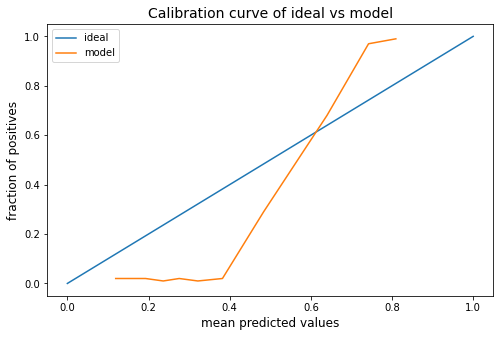

In [ ]:
# Reliability curve of model vs ideal model on cv data

Calibration_Curve(y_cv, fcv)

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F

In [ ]:
# Modifying y_cv as per above image to avoid overfitting instead of 0s and 1s

y_cv_modified = y_cv.copy().astype(np.float)
y_cv_modified[y_cv_modified == 1] = (sum(y_train == 1) + 1) / (sum(y_train == 1) + 2)
y_cv_modified[y_cv_modified == 0] = 1 / (sum(y_train == 0) + 2)


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)```

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value


> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

### Functions from SGD implementation assignment

In [ ]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero

    w = np.zeros_like(dim)
    b = 0

    return w,b

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sigmoid_z = 1 / (1 + np.exp(-z))

    return sigmoid_z

def logloss(y_true, y_pred):
    '''In this function, we will compute log loss '''

    loss = -1/len(y_true) * np.sum(((y_true * np.log10(y_pred)) + ((1-np.array(y_true)) * np.log10(1-np.array(y_pred)))))

    return loss

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''

    dw = x * (y - (sigmoid(np.dot(x,w) + b))) - alpha*(w/N)

    return dw

def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''

    db = y - sigmoid(np.dot(x,w) + b)

    return db

def train_SGD(X_train,y_train,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''

    dim = X_train[0]   # Array shape
    N = len(X_train)   # Number of data points
    w,b = initialize_weights(dim)   # initialize weights and bias

    train_losses = []    # Empty list for appending train losses
    for epoch in range(epochs):     # for every epoch
        for i in range(N):              # for every data point
            dw = gradient_dw(X_train[i], y_train[i], w, b, alpha, N)  # Compute gradient of vector weight w
            db = gradient_db(X_train[i], y_train[i], w, b)    # Compute gradient of bias b

            w += (eta0 * dw)       # update weight
            b += (eta0 * db)       # update bias

        y_train_pred = sigmoid(np.dot(X_train, w) + b)   # predict probability values for train data at end of  each epoch

        train_loss = logloss(y_train, y_train_pred)      # Compute train loss at end of each epoch
        train_losses.append(train_loss)     # Appending train loss at end of each epoch

        # print train losses at end of each epoch
        print('-- Epoch: ', epoch+1, ' -- train loss: ', round(train_loss, 8))
        # print('-'*60)

        # break for loop if update is smaller
        if epoch >= 1 and abs(train_losses[epoch] - train_losses[epoch-1]) <= 0.0001:
            break
    # Plot loss vs epoch plot for cv data
    print('\n')
    plt.figure(figsize = (9,6))
    plt.plot(range(epoch+1), train_losses, label = 'train loss')   # train loss curve
    plt.legend()     # add legend
    plt.xlabel('epochs', fontsize= 12)    # xlabel
    plt.ylabel('loss', fontsize = 12)     # ylabel
    plt.title('loss vs epoch plot', fontsize= 14)
    plt.grid(True)                        # adds grid
    plt.show()

    return np.array([w]), np.array([b])

-- Epoch:  1  -- train loss:  0.13901532
-- Epoch:  2  -- train loss:  0.11170415
-- Epoch:  3  -- train loss:  0.10134338
-- Epoch:  4  -- train loss:  0.09610075
-- Epoch:  5  -- train loss:  0.09303697
-- Epoch:  6  -- train loss:  0.09108451
-- Epoch:  7  -- train loss:  0.08976601
-- Epoch:  8  -- train loss:  0.08883779
-- Epoch:  9  -- train loss:  0.08816348
-- Epoch:  10  -- train loss:  0.08766141
-- Epoch:  11  -- train loss:  0.0872801
-- Epoch:  12  -- train loss:  0.08698569
-- Epoch:  13  -- train loss:  0.08675522
-- Epoch:  14  -- train loss:  0.08657263
-- Epoch:  15  -- train loss:  0.08642648
-- Epoch:  16  -- train loss:  0.08630843
-- Epoch:  17  -- train loss:  0.08621229




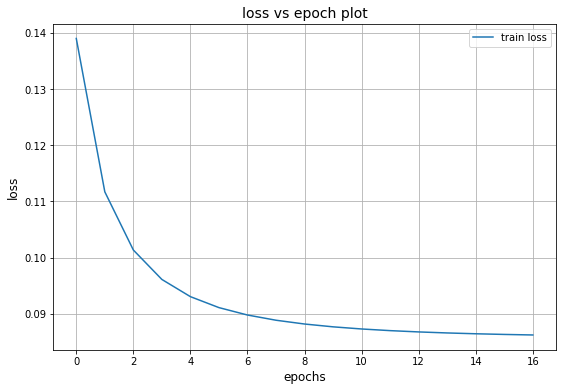

In [ ]:
# Getting optimal w and optimal b for eta0 = 0.001 and alpha= 0.001

optimal_w, optimal_b = train_SGD(fcv,y_cv_modified,50,0.001,0.001)

In [ ]:
# Calibrated values on cv data and test data

fcv_calib = sigmoid(np.dot(fcv.reshape(-1,1), optimal_w) + optimal_b)
ftest_calib = sigmoid(np.dot(ftest.reshape(-1,1), optimal_w) + optimal_b)

In [ ]:
# Brier score loss metric for calibration curves
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html

def brier_loss(y_true, y_pred):
    '''This function returns the mean squared difference between the predicted probability and the actual outcome'''

    loss = np.average((y_true - y_pred)**2)
    return loss

 Before Calibration on CV data 


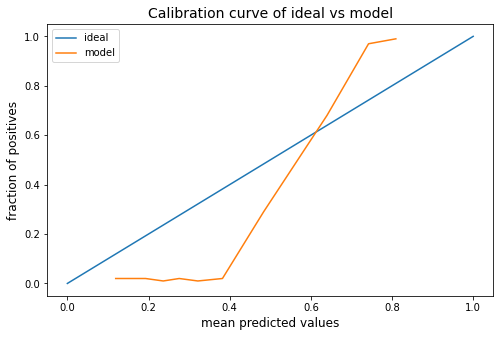



 After calibration on CV data 


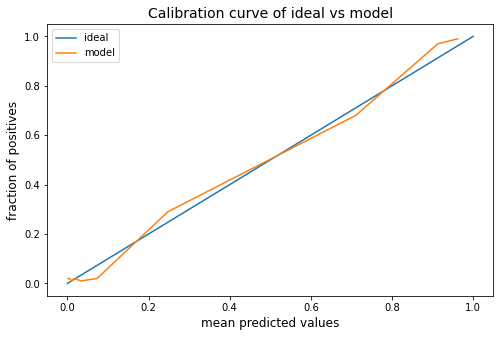



 Loss before calibration on cv data :  0.105
 Loss after calibration on cv data  :  0.054


In [ ]:
# CV data

print('\033[1m Before Calibration on CV data \033[0m')
Calibration_Curve(y_cv, fcv_scaled)

print('\n')
print('\033[1m After calibration on CV data \033[0m')
Calibration_Curve(y_cv, fcv_calib)

print('\n')
print('\033[1m Loss before calibration on cv data : \033[0m', round(brier_loss(y_cv, fcv_scaled),3))
print('\033[1m Loss after calibration on cv data  : \033[0m', round(brier_loss(y_cv, fcv_calib),3))

 Before Calibration on test data 


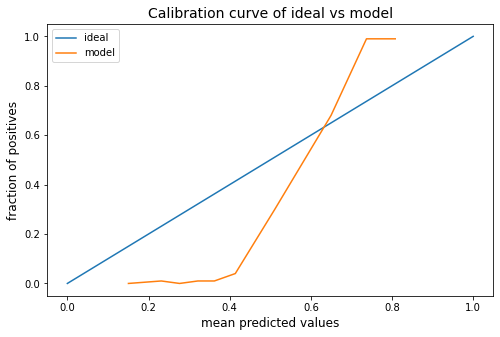



 After calibration on test data 


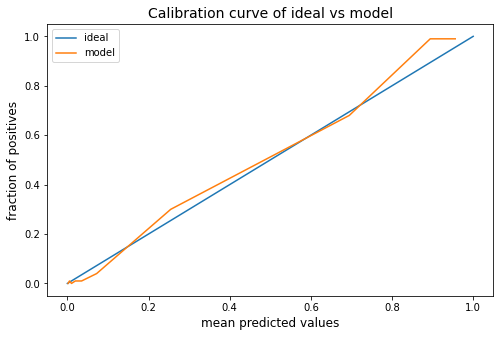



 Loss before calibration on test data :  0.115
 Loss after calibration on test data  :  0.05


In [ ]:
# Test data

print('\033[1m Before Calibration on test data \033[0m')
Calibration_Curve(y_test, ftest_scaled)

print('\n')
print('\033[1m After calibration on test data \033[0m')
Calibration_Curve(y_test, ftest_calib)

print('\n')
print('\033[1m Loss before calibration on test data : \033[0m', round(brier_loss(y_test, ftest_scaled),3))
print('\033[1m Loss after calibration on test data  : \033[0m', round(brier_loss(y_test, ftest_calib),3))

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity, we are excluding the hyerparameter tuning part__